# **Image Segmentation with K-means Clustering**

Based on https://github.com/Shag10/Machine-Learning/blob/master/Internity_Internship/Day-11/Image_Segmentation.ipynb?source=post_page-----46a60488ae71--------------------------------

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
 
%matplotlib inline

# **Color Clustering:**
Next step is to load the image in RGB color space

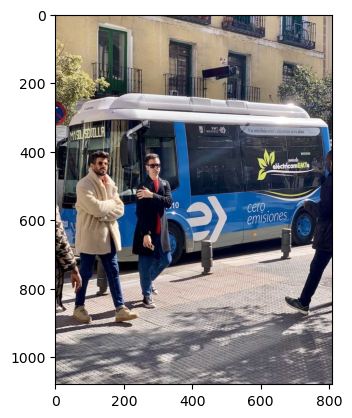

In [2]:
# Read in the image
image = cv2.imread('./bus.jpg')
 
# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
 
plt.imshow(image)

# Change the imaage to HSV
# image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

In [3]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))

# Convert to float type
pixel_vals = np.float32(pixel_vals)


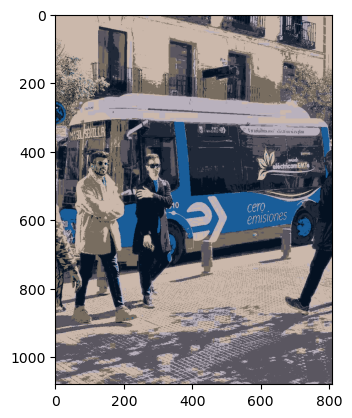

In [4]:
#the below line of code defines the criteria for the algorithm to stop running, 
#which will happen is 100 iterations are run or the epsilon (which is the required accuracy) 
#becomes 85%
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
 
# then perform k-means clustering with number of clusters defined as 3
#also random centres are initially choosed for k-means clustering
# cv2.kmeans(samples, nclusters, criteria, attempts, flags)
k = 7
compactness, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
 
# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))

plt.imshow(segmented_image)
# plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_HSV2RGB))

OpenCV provides cv2.kmeans(samples, nclusters, criteria, attempts, flags) function for color clustering.

1. samples: It should be of np.float32 data type, and each feature should be put in a single column.

2. nclusters(K): Number of clusters required at the end

3. criteria: It is the iteration termination criteria. When this criterion is satisfied, the algorithm iteration stops. A tuple of 3 parameters. They are `( type, max_iter, epsilon )`:

Type of termination criteria. It has 3 flags as below:

cv.TERM_CRITERIA_EPS — stop the algorithm iteration if specified accuracy, epsilon, is reached.
cv.TERM_CRITERIA_MAX_ITER — stop the algorithm after the specified number of iterations, max_iter.
cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER — stop the iteration when any of the above condition is met.
4. attempts: Flag to specify the number of times the algorithm is executed using different initial labelings. The algorithm returns the labels that yield the best compactness. This compactness is returned as output.

5. flags: This flag is used to specify how initial centers are taken. Normally two flags are used for this: cv.KMEANS_PP_CENTERS and cv.KMEANS_RANDOM_CENTERS.

(874800, 2)
[[255.          38.82039335   0.26816276]
 [106.30271107  39.362517     0.26816276]
 [154.73077914 181.63620798   0.26816276]
 [ 34.6904389   36.94730087   0.26816276]
 [ 42.01546898 111.18436498   0.26816276]
 [180.90710775  42.52196908   0.26816276]
 [246.57838981 181.53063853   0.26816276]
 [ 52.27404071 182.38728957   0.26816276]
 [132.01153889 114.78922601   0.26816276]
 [235.87160214 112.5393038    0.26816276]]


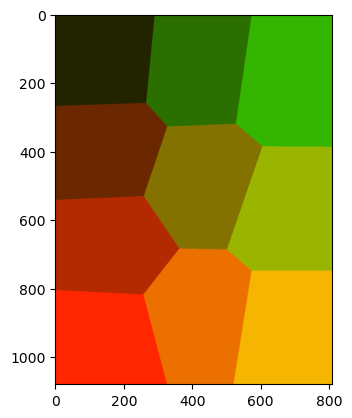

In [5]:
# Let's do the same but using pixel locations

# Pixel 2D locations
pixel_locations = np.meshgrid(np.arange(image.shape[0]), np.arange(image.shape[1]), indexing="ij")
pixel_locations = np.stack(pixel_locations, axis=-1).reshape(-1, 2)
pixel_locations = np.float32(pixel_locations)
print(pixel_locations.shape)



criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
 
k = 10
compactness, labels, centers = cv2.kmeans(pixel_locations, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# print(centers)
#Add a feature to the centers
feature = np.ones(centers.shape[0]).reshape(-1, 1)
# print(feature)
centers = np.concatenate([centers, feature], axis=1)
# Rescale centers to be in 0-255, to be interpreted as colors for display purposes
centers = centers / np.max(centers) * 255

print(centers)

# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
 
# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
 
plt.imshow(segmented_image)

93.7861
472.00003
[[ 12.191208  22.08036  153.75179  105.46034   53.895054]
 [137.63759   22.158396  95.24813  118.82693   56.424896]
 [ 10.177662  22.86227  224.79686   95.93545   51.992744]
 [122.24793   36.175453  84.61465   36.220604  57.328552]
 [ 16.841751  46.659767 167.43819   17.555096  77.15494 ]
 [105.98413  213.04036  154.69234   69.23382   56.79849 ]
 [ 18.419168  66.62735  193.80804   16.698198  25.561533]
 [ 17.405874  81.30521  145.87978   67.607475  14.789876]
 [134.87433   17.607159 201.07506   42.69098   56.727795]
 [154.3621    11.30742  149.00769  120.47235   50.031494]
 [112.77336  159.70218   46.19723   59.524395  59.59406 ]
 [ 13.609126 205.34622   41.53464   57.141052  20.07196 ]
 [ 23.770205  44.57862   79.40909   52.987564  31.436527]
 [112.967834  88.83295   59.238087  49.620483  57.125397]
 [116.68449  238.36913   30.859259  76.20341   46.55094 ]]


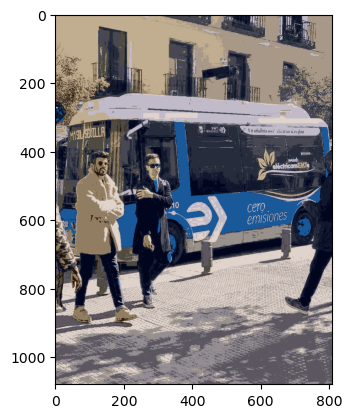

In [10]:
# Now let's use both colors and pixel locations!

# The input values are the RGB values and also the location of the pixel
input_values = np.concatenate([pixel_vals, pixel_locations/1], axis=1)
# print(pixel_vals.mean())
# print(pixel_locations.mean())

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
 
k = 15
compactness, labels, centers = cv2.kmeans(input_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

print(centers)
centers = centers[:, :3]

# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
 
# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
 
plt.imshow(segmented_image)
# plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_HSV2RGB))